In [72]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

## Getting to Know the Data

In [73]:
# Loading data as pandas dataframe

# Naming the columns with attributes they represent
names = ['account_status', 'duration', 'credit_history',
             'purpose', 'credit_amount', 'savings_account', 'employment_since',
             'installment_rate', 'personal_status_sex', 'guarantors', 
             'residence_since', 'property', 'age', 'other_installment_plans',
             'housing', 'number_of_credits', 'job', 'people_to_maintain',
             'phone', 'foreign_worker', 'creditworthy']

df = pd.read_csv('data/kredit.dat', header=None, sep="\t", names=names)
# df = pd.read_csv('data/einkommen.train.txt', header=None, sep=",")

In [74]:
# Getting familiar with data

print(f'Number of data points: {df.shape[0]}')
print(f'Number of Attributes: {df.shape[1]}')
df.head(10)

Number of data points: 1000
Number of Attributes: 21


,account_status,duration,credit_history,purpose,credit_amount,savings_account,employment_since,installment_rate,personal_status_sex,guarantors,...,property,age,other_installment_plans,housing,number_of_credits,job,people_to_maintain,phone,foreign_worker,creditworthy
0,A14,36,A32,?,2299,A63,?,4,A93,A101,...,A123,39,A143,A152,1,A173,1,A191,?,1
1,A12,18,A32,A46,1239,A65,A73,4,A93,A101,...,A124,61,A143,A153,1,?,1,A191,A201,1
2,A13,24,A32,A40,947,A61,A74,4,A93,A101,...,A124,38,A141,A153,1,?,2,A191,?,2
3,A14,15,A33,A43,1478,A61,A73,4,A94,A101,...,A121,33,A141,A152,2,A173,1,A191,A201,1
4,A14,24,A32,A40,1525,A64,A74,4,A92,A101,...,A123,34,A143,A152,1,A173,2,A192,A201,1
5,A12,24,A34,A40,3878,A62,?,4,A91,A101,...,A123,37,A143,A152,1,?,1,A192,A201,1
6,A14,24,A32,A41,6313,A65,A75,3,A93,A101,...,A123,41,A143,A152,1,A174,2,A192,A201,1
7,A11,21,A33,A46,3414,A61,?,2,A93,A101,...,A122,26,A143,A152,2,A173,1,A191,A201,2
8,A11,24,A34,A41,6419,A61,?,2,A92,A101,...,A124,44,A143,A153,2,A174,2,A192,A201,1
9,A12,18,A32,?,1924,A65,A72,4,A92,A101,...,A121,27,A143,A151,1,A173,1,A191,?,2


In [75]:
# Show how many unique values we have: useful for one-hot encoding
df.nunique()

account_status               4
duration                    33
credit_history               5
purpose                     11
credit_amount              921
savings_account              5
employment_since             6
installment_rate             4
personal_status_sex          4
guarantors                   3
residence_since              4
property                     4
age                         53
other_installment_plans      3
housing                      3
number_of_credits            4
job                          5
people_to_maintain           2
phone                        2
foreign_worker               3
creditworthy                 2
dtype: int64

In [76]:
#Describing numerical values.
df.describe()

,duration,credit_amount,installment_rate,residence_since,age,number_of_credits,people_to_maintain,creditworthy
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [77]:
df.describe(exclude=[np.number]) 

,account_status,credit_history,purpose,savings_account,employment_since,personal_status_sex,guarantors,property,other_installment_plans,housing,job,phone,foreign_worker
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,11,5,6,4,3,4,3,3,5,2,3
top,A14,A32,A43,A61,?,A93,A101,A123,A143,A152,A173,A191,A201
freq,394,530,226,603,496,548,907,332,814,713,484,596,613


1    700
2    300
Name: creditworthy, dtype: int64


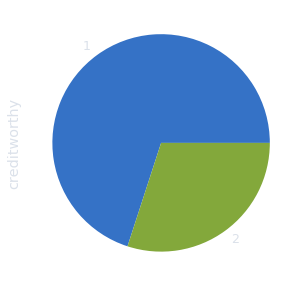

In [78]:
# How balanced is the dataset?
# 1 = yes
# 2 = no
print(df.creditworthy.value_counts())

df.creditworthy.value_counts().plot.pie(figsize=(5, 5))

# There are more than twice as many creditworthy examples

## 2. Data Pre-Processing

### 2.1 Feature Representation

In [79]:
# Feature representation

print("Unique categorical values:")
for att in df.select_dtypes(include=[object]):
    print(att,":", df[att].unique())
    
# We will have to represent features differently 

Unique categorical values:
account_status : ['A14' 'A12' 'A13' 'A11']
credit_history : ['A32' 'A33' 'A34' 'A30' 'A31']
purpose : ['?' 'A46' 'A40' 'A43' 'A41' 'A42' 'A49' 'A410' 'A45' 'A48' 'A44']
savings_account : ['A63' 'A65' 'A61' 'A64' 'A62']
employment_since : ['?' 'A73' 'A74' 'A75' 'A72' 'A71']
personal_status_sex : ['A93' 'A94' 'A92' 'A91']
guarantors : ['A101' 'A102' 'A103']
property : ['A123' 'A124' 'A121' 'A122']
other_installment_plans : ['A143' 'A141' 'A142']
housing : ['A152' 'A153' 'A151']
job : ['A173' '?' 'A174' 'A172' 'A171']
phone : ['A191' 'A192']
foreign_worker : ['?' 'A201' 'A202']


### 2.2 Missing Values

In [80]:
# Missing Values
# For more convenient operations for missing values, replace ? with NaN
df.replace("?", np.nan, inplace=True)
df.head(10)

,account_status,duration,credit_history,purpose,credit_amount,savings_account,employment_since,installment_rate,personal_status_sex,guarantors,...,property,age,other_installment_plans,housing,number_of_credits,job,people_to_maintain,phone,foreign_worker,creditworthy
0,A14,36,A32,NaN,2299,A63,NaN,4,A93,A101,...,A123,39,A143,A152,1,A173,1,A191,NaN,1
1,A12,18,A32,A46,1239,A65,A73,4,A93,A101,...,A124,61,A143,A153,1,NaN,1,A191,A201,1
2,A13,24,A32,A40,947,A61,A74,4,A93,A101,...,A124,38,A141,A153,1,NaN,2,A191,NaN,2
3,A14,15,A33,A43,1478,A61,A73,4,A94,A101,...,A121,33,A141,A152,2,A173,1,A191,A201,1
4,A14,24,A32,A40,1525,A64,A74,4,A92,A101,...,A123,34,A143,A152,1,A173,2,A192,A201,1
5,A12,24,A34,A40,3878,A62,NaN,4,A91,A101,...,A123,37,A143,A152,1,NaN,1,A192,A201,1
6,A14,24,A32,A41,6313,A65,A75,3,A93,A101,...,A123,41,A143,A152,1,A174,2,A192,A201,1
7,A11,21,A33,A46,3414,A61,NaN,2,A93,A101,...,A122,26,A143,A152,2,A173,1,A191,A201,2
8,A11,24,A34,A41,6419,A61,NaN,2,A92,A101,...,A124,44,A143,A153,2,A174,2,A192,A201,1
9,A12,18,A32,NaN,1924,A65,A72,4,A92,A101,...,A121,27,A143,A151,1,A173,1,A191,NaN,2


In [81]:
print(f'Number of Missing Values:\n\n{df.isnull().sum()}')

Number of Missing Values:

account_status               0
duration                     0
credit_history               0
purpose                    173
credit_amount                0
savings_account              0
employment_since           496
installment_rate             0
personal_status_sex          0
guarantors                   0
residence_since              0
property                     0
age                          0
other_installment_plans      0
housing                      0
number_of_credits            0
job                        232
people_to_maintain           0
phone                        0
foreign_worker             360
creditworthy                 0
dtype: int64


### 2.3 Feature Selection